<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow methiod to determine the best k for Kmeans


In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

### Data

C:\Users\lvv05\AppData\Local\Temp\ipykernel_5080\1299599584.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(list((zip(X,y))))


<IPython.core.display.Javascript object>


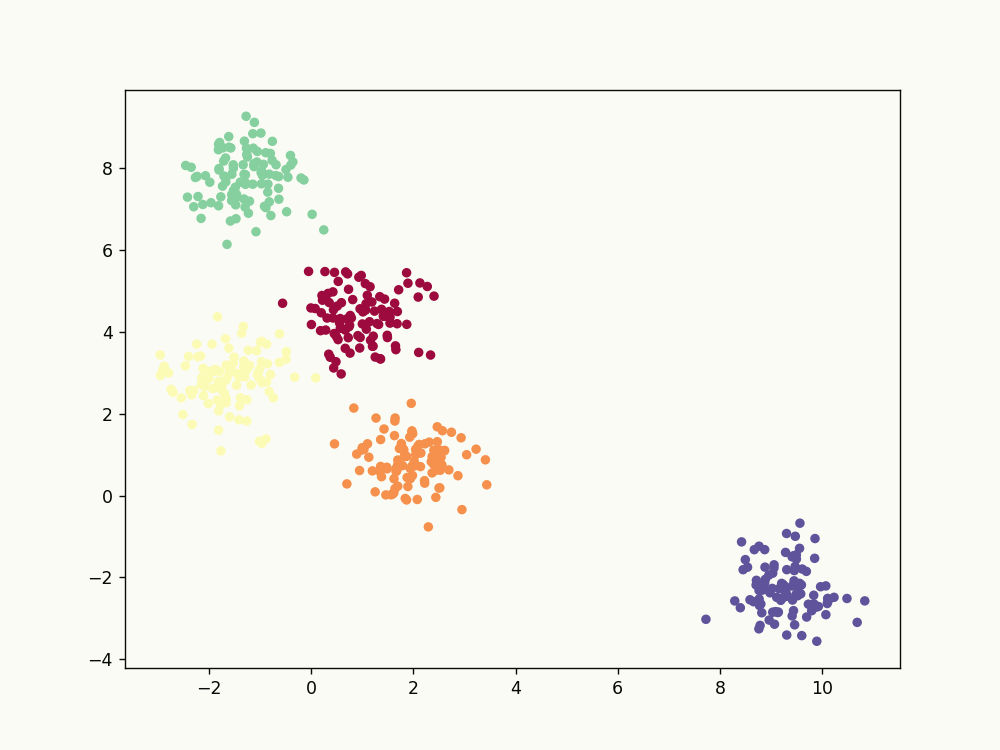

In [10]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
data = np.array(list((zip(X,y))))

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

### Agglomerative clustering using complete linkage

In [17]:
clf = AgglomerativeClustering(n_clusters=4, linkage= 'complete')
predicted_complete = clf.fit_predict(X)

<IPython.core.display.Javascript object>


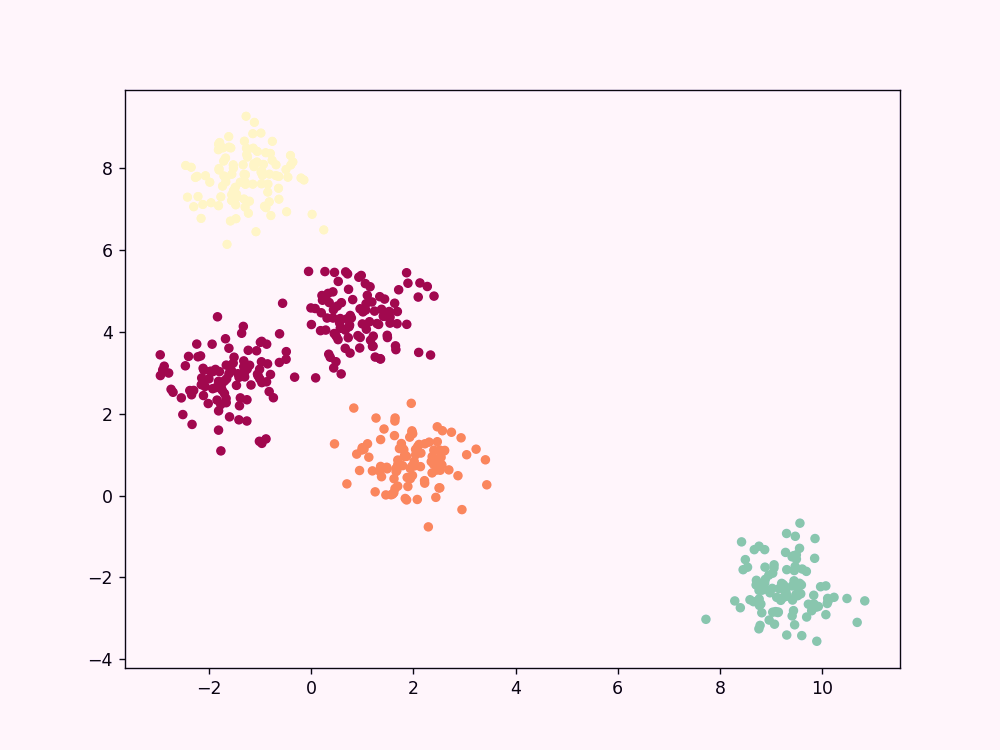

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted_complete], s= 20)  

### Agglomerative clustering using single linkage

In [19]:
clf = AgglomerativeClustering(n_clusters=4, linkage= 'single')
predicted_single = clf.fit_predict(X)

<IPython.core.display.Javascript object>


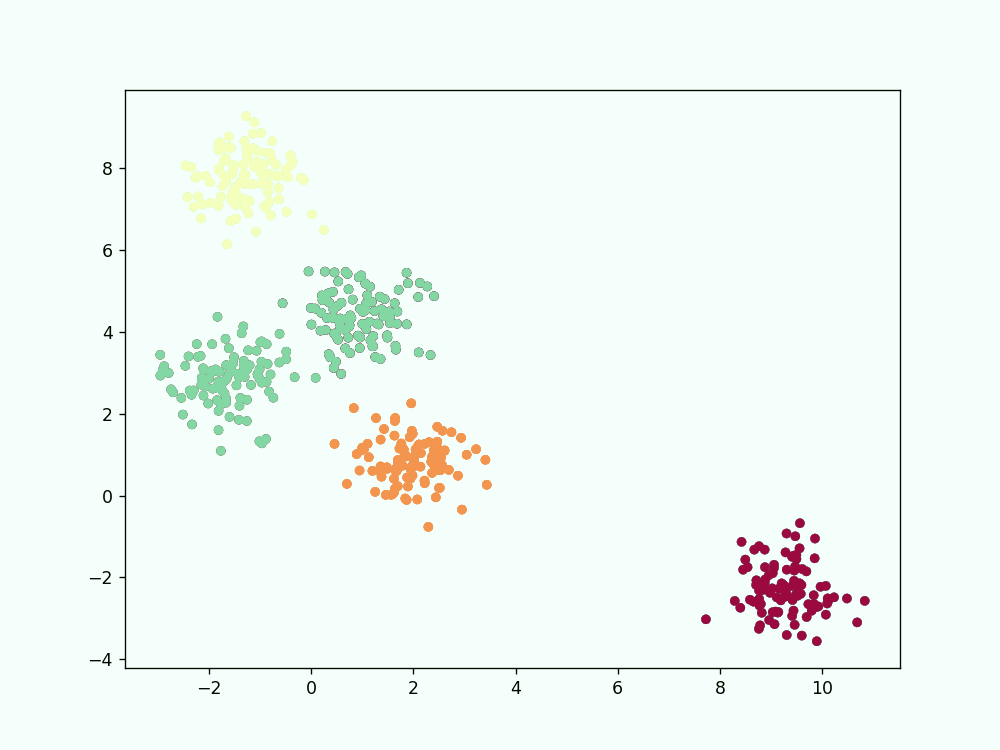

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted_single], s= 20)  

### DBSCAN


(density-based spatial clustering of applications with noise)


In [31]:
from sklearn.cluster import DBSCAN

In [37]:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

predicted = dbscan.labels_
n_clusters_and_noice = len(np.unique(predicted))-1
print ('n_clusters_and_noice ={}\n'.format(n_clusters_and_noice))

predicted[np.where(predicted == -1)] = n_clusters_and_noice

n_clusters_and_noice =7



<IPython.core.display.Javascript object>


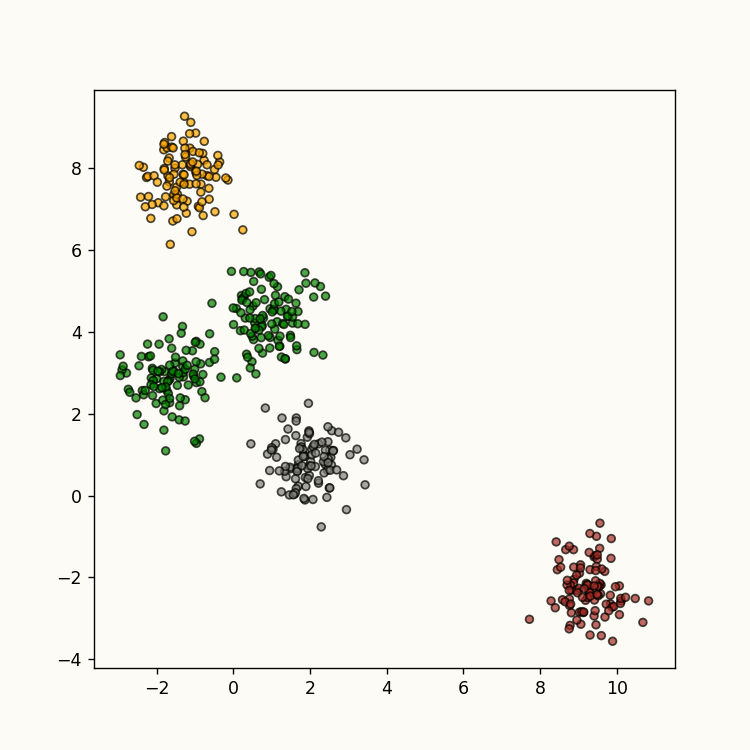

In [38]:
plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
colors= np.r_[colors, np.array(['black']*100)]

plt.scatter(X[:,0], X[:,1], c= colors[predicted_complete], s= 20, edgecolor = 'black', label='negative', alpha = 0.7) 


<IPython.core.display.Javascript object>


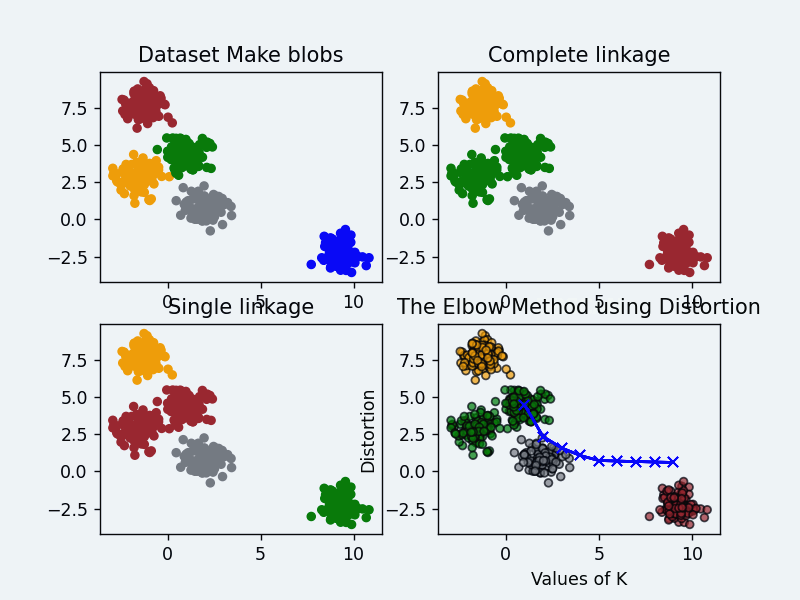

Text(0.5, 1.0, 'DBSCAN')

In [39]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].scatter(X[:,0], X[:,1], c= colors[y], s= 20) 
axis[0, 0].set_title("Dataset Make blobs")

axis[0, 1].scatter(X[:,0], X[:,1], c= colors[predicted_complete], s= 20) 
axis[0, 1].set_title("Complete linkage")

axis[1, 0].scatter(X[:,0], X[:,1], c= colors[predicted_single], s= 20) 
axis[1, 0].set_title("Single linkage")

axis[1, 1].scatter(X[:,0], X[:,1], c= colors[predicted_complete], s= 20, edgecolor = 'black', label='negative', alpha = 0.7)
axis[1, 1].set_title("DBSCAN")

### Use elbow method to determine the best k for Kmeans

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [46]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [50]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 4.48526702400156
2 : 2.3478624989000085
3 : 1.5812271441595096
4 : 1.0740825172168529
5 : 0.73428611030755
6 : 0.6999668474993229
7 : 0.6649794635069399
8 : 0.6340933127000562
9 : 0.6088405299772656


<IPython.core.display.Javascript object>


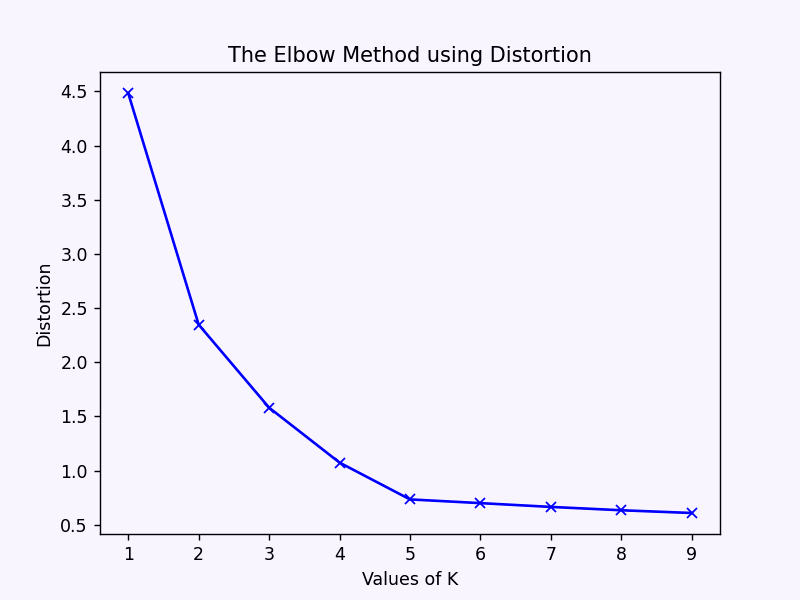

In [52]:
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### The best k = 5